# データサイエンス100本ノック（構造化データ加工編） - Python

## はじめに
- 初めに以下のセルを実行してください
- 必要なライブラリのインポートとデータベース（PostgreSQL）からのデータ読み込みを行います
- pandas等、利用が想定されるライブラリは以下セルでインポートしています
- その他利用したいライブラリがあれば適宜インストールしてください（"!pip install ライブラリ名"でインストールも可能）
- 処理は複数回に分けても構いません
- 名前、住所等はダミーデータであり、実在するものではありません

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import math
import psycopg2
from sqlalchemy import create_engine
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler # conda install -c conda-forge imbalanced-learn

df_customer = pd.read_csv("./data/customer.csv")
df_category = pd.read_csv("./data/category.csv")
df_product = pd.read_csv("./data/product.csv")
df_receipt = pd.read_csv("./data/receipt.csv")
df_store = pd.read_csv("./data/store.csv")
df_geocode = pd.read_csv("./data/geocode.csv")

C:\Users\iiats\Anaconda3\envs\Python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


---
> P-076: 顧客データフレーム（df_customer）から性別（gender_cd）の割合に基づきランダムに10%のデータを層化抽出データし、性別ごとに件数を集計せよ。

In [2]:
df_customer.head()

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
0,CS021313000114,大野 あや子,1,女性,1981-04-29,37,259-1113,神奈川県伊勢原市粟窪**********,S14021,20150905,0-00000000-0
1,CS037613000071,六角 雅彦,9,不明,1952-04-01,66,136-0076,東京都江東区南砂**********,S13037,20150414,0-00000000-0
2,CS031415000172,宇多田 貴美子,1,女性,1976-10-04,42,151-0053,東京都渋谷区代々木**********,S13031,20150529,D-20100325-C
3,CS028811000001,堀井 かおり,1,女性,1933-03-27,86,245-0016,神奈川県横浜市泉区和泉町**********,S14028,20160115,0-00000000-0
4,CS001215000145,田崎 美紀,1,女性,1995-03-29,24,144-0055,東京都大田区仲六郷**********,S13001,20170605,6-20090929-2


In [3]:
# 公式解答例
# そうか、rain_test_split() にこんな使い方もあったんだな。
# sklearn.model_selection.train_test_splitを使用した例
_, df_tmp = train_test_split(df_customer, test_size=0.1, stratify=df_customer['gender'])
df_tmp.groupby('gender_cd').agg({'customer_id' : 'count'})
df_tmp.head(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
4133,CS023515000140,小野 未華子,1,女性,1959-12-09,59,212-0011,神奈川県川崎市幸区幸町**********,S14023,20150828,B-20100501-C
1568,CS030313000002,薬師丸 さとみ,1,女性,1985-11-03,33,272-0022,千葉県市川市鬼越**********,S12030,20150227,0-00000000-0
17060,CS018613000152,望月 瞬,1,女性,1955-08-10,63,204-0022,東京都清瀬市松山**********,S13018,20151128,0-00000000-0
5675,CS017204000001,滝川 満,0,男性,1989-11-16,29,164-0011,東京都中野区中央**********,S13017,20151228,D-20101012-D
13766,CS001411000141,高村 あさみ,1,女性,1973-12-13,45,212-0004,神奈川県川崎市幸区小向西町**********,S13001,20170407,0-00000000-0
16234,CS021503000019,森永 浩正,0,男性,1958-10-17,60,259-1143,神奈川県伊勢原市下糟屋**********,S14021,20150411,0-00000000-0
5890,CS035612000039,野際 瞳,1,女性,1957-05-12,61,156-0055,東京都世田谷区船橋**********,S13035,20150609,0-00000000-0
17946,CS018513000027,倉本 恵麻,1,女性,1967-06-21,51,203-0051,東京都東久留米市小山**********,S13018,20150717,8-20100808-6
11733,CS021514000045,佐々木 麻由子,1,女性,1965-01-09,54,259-1112,神奈川県伊勢原市東富岡**********,S14021,20150617,F-20100901-F
366,CS011511000005,石田 由樹,1,女性,1965-01-03,54,211-0002,神奈川県川崎市中原区上丸子山王町**********,S14011,20151209,4-20100329-3


In [20]:
# どんくさい方法ですが自分で書いてみます。
df_male = df.query('gender == "男性"')
df_female = df.query('gender == "女性"')
df_unknown = df.query('gender == "不明"')
print("male: ", df_male.shape[0], "人")
print("female: ", df_female.shape[0], "人")
print("unknown: ", df_unknown.shape[0], "人")

male:  2981 人
female:  17918 人
unknown:  1072 人


In [23]:
df_male_sample = df_male.sample(frac=0.1)
df_female_sample = df_female.sample(frac=0.1)
df_unknown_sample = df_unknown.sample(frac=0.1)
print("male: ", df_male_sample.shape[0], "人")
print("female: ", df_female_sample.shape[0], "人")
print("unknown: ", df_unknown_sample.shape[0], "人")

male:  298 人
female:  1792 人
unknown:  107 人


In [26]:
pd.concat([df_male_sample, df_female_sample, df_unknown_sample]).sample(frac=1).head(10)

,customer_id,customer_name,gender_cd,gender,birth_day,age,postal_cd,address,application_store_cd,application_date,status_cd
11414,CS001313000087,相原 桃子,1,女性,1983-03-15,36,144-0035,東京都大田区南蒲田**********,S13001,20150626,0-00000000-0
13385,CS010315000191,奥貫 明日,1,女性,1984-01-03,35,222-0026,神奈川県横浜市港北区篠原町**********,S14010,20150725,0-00000000-0
13817,CS005315000108,田川 彩華,1,女性,1985-03-01,34,167-0022,東京都杉並区下井草**********,S13005,20150623,1-20080219-1
14738,CS002713000044,山崎 結衣,1,女性,1940-06-08,78,185-0013,東京都国分寺市西恋ケ窪**********,S13002,20150608,0-00000000-0
9989,CS005411000073,村井 右京,9,不明,1975-03-08,44,179-0074,東京都練馬区春日町**********,S13005,20170623,0-00000000-0
13073,CS014413000175,塩田 めぐみ,9,不明,1971-10-13,47,263-0051,千葉県千葉市稲毛区園生町**********,S12014,20150223,0-00000000-0
7700,CS023502000075,役所 克実,0,男性,1963-01-25,56,212-0016,神奈川県川崎市幸区南幸町**********,S14023,20171217,0-00000000-0
5242,CS007412000036,菅谷 真奈美,1,女性,1976-07-17,42,276-0023,千葉県八千代市勝田台**********,S12007,20150318,0-00000000-0
6830,CS005613000033,奈良 季衣,1,女性,1949-12-22,69,167-0022,東京都杉並区下井草**********,S13005,20150801,0-00000000-0
16778,CS033614000017,田村 麻由子,1,女性,1957-01-07,62,246-0022,神奈川県横浜市瀬谷区三ツ境**********,S14033,20150619,1-20080729-5


---
> P-077: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客単位に合計し、合計した売上金額の外れ値を抽出せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。なお、ここでは外れ値を平均から3σ以上離れたものとする。結果は10件表示させれば良い。

In [31]:
# 公式解答例を参照
# skleanのpreprocessing.scaleを利用するため、標本標準偏差で計算されている
df_sales_amount = df_receipt.query('not customer_id.str.startswith("Z")', engine='python'). \
    groupby('customer_id').agg({'amount':'sum'}).reset_index()
df_sales_amount.head()

,customer_id,amount
0,CS001113000004,1298
1,CS001114000005,626
2,CS001115000010,3044
3,CS001205000004,1988
4,CS001205000006,3337


In [32]:
df_sales_amount['amount_ss'] = preprocessing.scale(df_sales_amount['amount'])
df_sales_amount.head()

,customer_id,amount,amount_ss
0,CS001113000004,1298,-0.459378
1,CS001114000005,626,-0.706390
2,CS001115000010,3044,0.182413
3,CS001205000004,1988,-0.205749
4,CS001205000006,3337,0.290114


In [34]:
df_sales_amount["abs_amount_ss"] = abs(df_sales_amount.amount_ss)
df_sales_amount.head()

,customer_id,amount,amount_ss,abs_amount_ss
0,CS001113000004,1298,-0.459378,0.459378
1,CS001114000005,626,-0.706390,0.706390
2,CS001115000010,3044,0.182413,0.182413
3,CS001205000004,1988,-0.205749,0.205749
4,CS001205000006,3337,0.290114,0.290114


In [35]:
df_sales_amount.query('abs_amount_ss >= 3').head(10)

,customer_id,amount,amount_ss,abs_amount_ss
332,CS001605000009,18925,6.019921,6.019921
1755,CS006415000147,12723,3.740202,3.740202
1817,CS006515000023,18372,5.816651,5.816651
1833,CS006515000125,12575,3.685800,3.685800
1841,CS006515000209,11373,3.243972,3.243972
1870,CS007115000006,11528,3.300946,3.300946
1941,CS007514000056,13293,3.949721,3.949721
1943,CS007514000094,15735,4.847347,4.847347
1951,CS007515000107,11188,3.175970,3.175970
1997,CS007615000026,11959,3.459372,3.459372


---
> P-078: レシート明細データフレーム（df_receipt）の売上金額（amount）を顧客単位に合計し、合計した売上金額の外れ値を抽出せよ。ただし、顧客IDが"Z"から始まるのものは非会員を表すため、除外して計算すること。なお、ここでは外れ値を第一四分位と第三四分位の差であるIQRを用いて、「第一四分位数-1.5×IQR」よりも下回るもの、または「第三四分位数+1.5×IQR」を超えるものとする。結果は10件表示させれば良い。

In [37]:
# skleanのpreprocessing.scaleを利用するため、標本標準偏差で計算されている
df_sales_amount = df_receipt.query('not customer_id.str.startswith("Z")', engine='python'). \
    groupby('customer_id').agg({'amount':'sum'}).reset_index()

In [39]:
pct75 = np.percentile(df_sales_amount['amount'], q=75)
pct25 = np.percentile(df_sales_amount['amount'], q=25)
iqr = pct75 - pct25
amount_low = pct25 - (iqr * 1.5)
amount_hight = pct75 + (iqr * 1.5)
print(amount_low)
print(amount_hight)

-4104.0
8302.0


In [41]:
# Pandas.queryに変数を入れる方法
# https://teratail.com/questions/163958
df_sales_amount.query('amount < @amount_low or @amount_hight < amount').head(10)

,customer_id,amount
98,CS001414000048,8584
332,CS001605000009,18925
549,CS002415000594,9568
1180,CS004414000181,9584
1558,CS005415000137,8734
1733,CS006414000001,9156
1736,CS006414000029,9179
1752,CS006415000105,10042
1755,CS006415000147,12723
1757,CS006415000157,10648


---
> P-079: 商品データフレーム（df_product）の各項目に対し、欠損数を確認せよ。

In [42]:
df_product.isnull().sum()

product_cd            0
category_major_cd     0
category_medium_cd    0
category_small_cd     0
unit_price            7
unit_cost             7
dtype: int64

<AxesSubplot:>

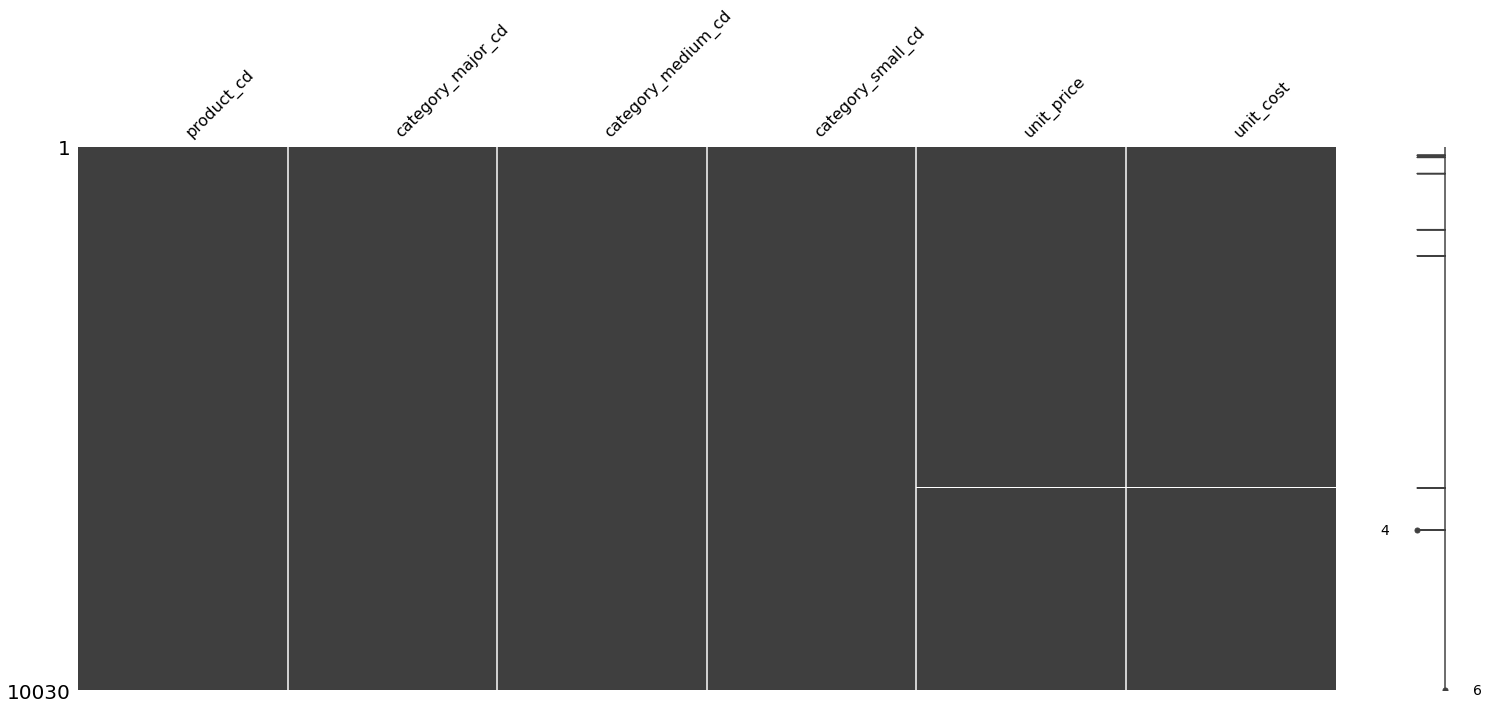

In [43]:
# おまけ：欠損値のグラフ化
import missingno as msno # conda install -c conda-forge missingno
msno.matrix(df_product)

---
> P-080: 商品データフレーム（df_product）のいずれかの項目に欠損が発生しているレコードを全て削除した新たなdf_product_1を作成せよ。なお、削除前後の件数を表示させ、前設問で確認した件数だけ減少していることも確認すること。

In [44]:
df_product_1 = df_product.copy() # 値渡し(deep copy)
print('削除前:', len(df_product_1))
df_product_1.dropna(inplace=True)
print('削除後:', len(df_product_1))

削除前: 10030
削除後: 10023
